# Ford GoBike Trip Data Exploration
## by Oreoluwa Sobiye
 
## Introduction
> This data cotains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The data set includes the following fields:
- duration_sec: This field shows the number of seconds a bike trip lasts.
- start_time: This field show the date, time a bike trip starts.
- start_station_id: ID of the starting station
- start_station_name: Name of the starting station
- start_station_longitude: Measure of the
- start_station_latitude
- end_station_id
- end_station_name
- end_station_longitude
- end_station_latitude
- bike_id
- user_type: Type of members that take ride
- member_birth_year: Birth year of members
- memeber_gender: Gender of the user_type



## Preliminary Wrangling


In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [35]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [36]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [38]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [39]:
df.shape

(183412, 16)

In [40]:
df.duplicated().sum()

0

In [41]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [42]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Issues

1. Wrong data types
2. Columns with missing values


### Data Wrangling

In [43]:
# Creating a copy of the data
df_copy = df.copy()

In [44]:
# Changing data types of columns
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [46]:
# fill null rows with average age
mean_value = df_copy['member_birth_year'].mean()
df_copy['member_birth_year'].fillna(value = mean_value, inplace = True)

In [47]:
#change member_birth_year to data type int
df_copy['member_birth_year'].isna().sum()
df_copy['member_birth_year'].astype('int')

0         1984
1         1984
2         1972
3         1989
4         1974
5         1959
6         1983
7         1989
8         1988
9         1992
10        1996
11        1993
12        1990
13        1984
14        1988
15        1993
16        1981
17        1975
18        1990
19        1978
20        1983
21        1984
22        1991
23        1997
24        1975
25        1986
26        2000
27        1982
28        1984
29        1995
          ... 
183382    1988
183383    1997
183384    1991
183385    1945
183386    1998
183387    1999
183388    1927
183389    1985
183390    1999
183391    1980
183392    1993
183393    1985
183394    1975
183395    1993
183396    1991
183397    1988
183398    1982
183399    1993
183400    1984
183401    1991
183402    1984
183403    2000
183404    1980
183405    1984
183406    1988
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 183412, dtype: int64

### What is the structure of your dataset?

> The data is made up of 183412 observations and 16 fields. Each field is made up of different data types. The fields available in the dataset includes; duration_sec, start_time,end_time, start_station_id, start_station_name, start_station_latitude,  start_station_longitude, end_station_id,end_start_name, end_start_latitude, end_station_longitude, bike_share_for_all. 

> The data contains null values.

### What is/are the main feature(s) of interest in your dataset?

> My interest in this datasest is to figure out what factors surrounding the count of bike trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that most bike trips start on fridays to end during weekends than weedkdays since most people don't work on weekends. I also expect that more males will be willing to take more bike trips than females and most bike trips will be taken by suscribers than customers. Suscribers get mails from the company, they will have more information on special deals and discounts.
It is also important to note that distance is a key factor in affect trips, the shorter the distance the greater then number of bike trips.

> The following features in the dataset will be used to help support my investigation;
* start_time
* end_time
* user_type
* member_birth_year
* member_gender
* bike_share_for_all_trip


## Univariate Exploration


In [48]:
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.000000,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984.806437,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.000000,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.000000,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.000000,Male,Yes


### Which user_type take the most bike trips?

In [49]:
df_copy['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [50]:
df_copy['user_type'].describe()

count         183412
unique             2
top       Subscriber
freq          163544
Name: user_type, dtype: object

In [51]:
def count_plot(size,x1, df,t):
    # fuction to show a count plot
    plt.figure(figsize = size)
    sb.countplot(x = x1,data = df )
    plt.title(t)
    plt.show()

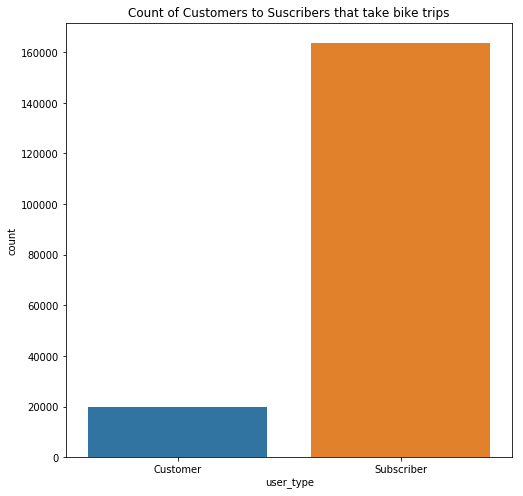

In [52]:
count_plot((8,8),'user_type',df_copy,'Count of Customers to Suscribers that take bike trips')

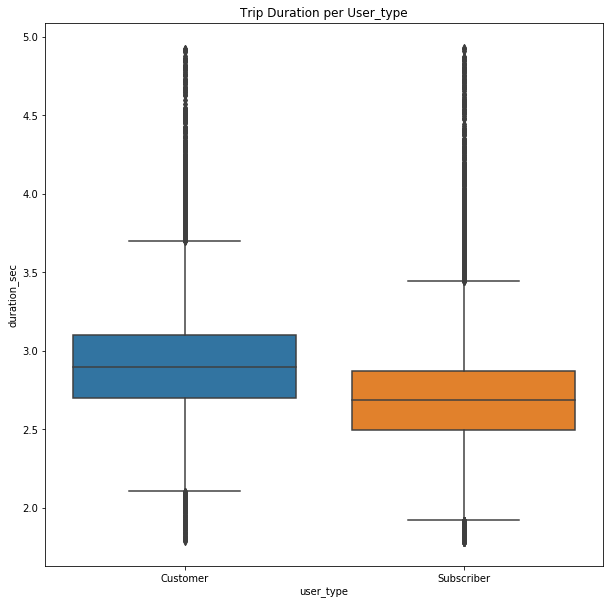

In [53]:
# box plot showing the duration_sec distribution of user type.
plt.figure(figsize = (10,10))
sb.boxplot(data = df_copy, x = 'user_type', y = np.log10(df_copy['duration_sec']))
plt.title('Trip Duration per User_type')
plt.show()

#### From the analysis above  most bike trips are taken by suscribers rather than customers as earlier predicted. 
> The barchart above shows the number of customers to suscribers that take bike trips often. There are 163544 suscribers in total and 19868 customers in total. More than fifty percent of bike trips are taken by suscribers than customers.

> The box plot indicates that there are quite a number of outliers. It is almost impossible to get a statistical insight of trip duration. It can be seen regardless that more customers spend more time on bike trips than suscribers.

### What days have the most frequent bike trips?

In [54]:
import datetime as dt
start_day = df_copy.start_time.dt.day_name()
end_day = df_copy.end_time.dt.day_name()

In [55]:
df_copy['start_day'] = start_day
df_copy['end_day'] = end_day

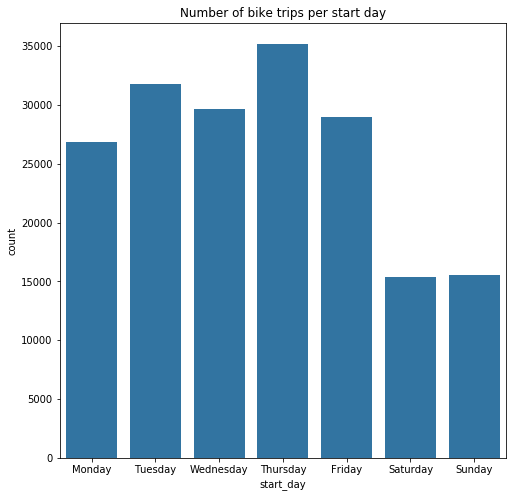

In [56]:
#days bike trips start
b = sb.color_palette()[0]
plt.figure(figsize = (8,8))
sb.countplot(data = df_copy, x = 'start_day',  color = b, order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'] )
plt.title('Number of bike trips per start day')
plt.show()

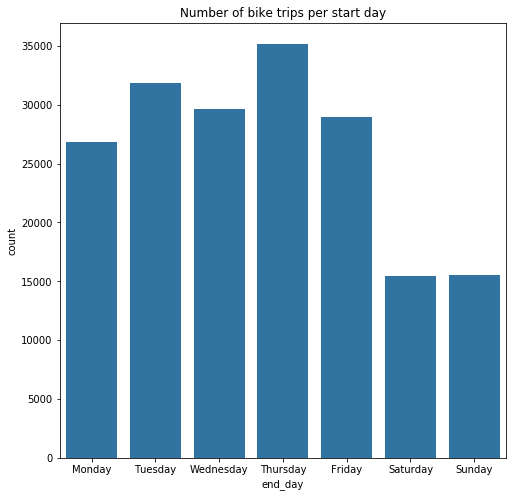

In [57]:
#days bike trips end
b = sb.color_palette()[0]
plt.figure(figsize = (8,8))
sb.countplot(data = df_copy, x = 'end_day',  color = b, order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'] )
plt.title('Number of bike trips per start day')
plt.show()

Both visualizations show that bike trips often start on the same day and end on the same day. Most bike trips are taken during the week days which is thursday  followed by tuesday. The least bike trips occur during the weekends; saturday and sunday.

### What's the duration for bike trips ?


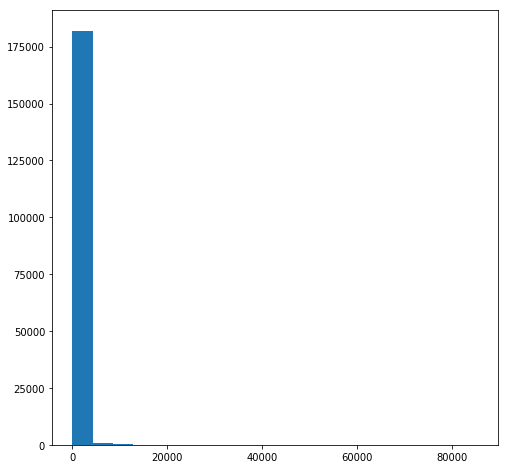

In [58]:
plt.figure(figsize = (8,8))
plt.hist(data  = df_copy, x = 'duration_sec' , bins = 20)
plt.show()

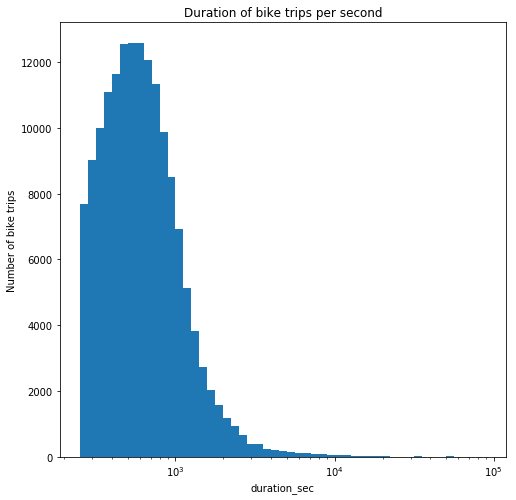

In [59]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize = (8,8))
plt.hist(data  = df_copy, x = 'duration_sec', bins = log_bins)
plt.gca().set_xscale("log")
plt.xlabel('duration_sec')
plt.ylabel('Number of bike trips')
plt.title('Duration of bike trips per second')
plt.show()

There seems to be a long tail at the right hand of the graph which shows that very few people take long rides. It could also mean that there are a lot of outliers.

### What gender take the most bike trips?

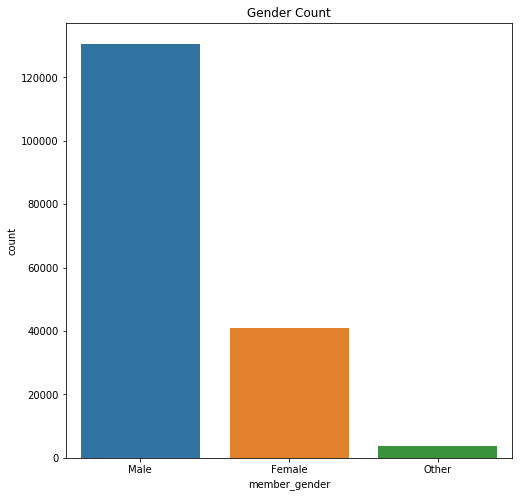

In [60]:
plt.figure(figsize = (8,8))
sb.countplot(data = df_copy, x = 'member_gender', order = ['Male', 'Female', 'Other'])
plt.title('Gender Count')
plt.show()

 The male gender take more bike trips than the female gender.

### Will bike shared have more number of bike trips ?

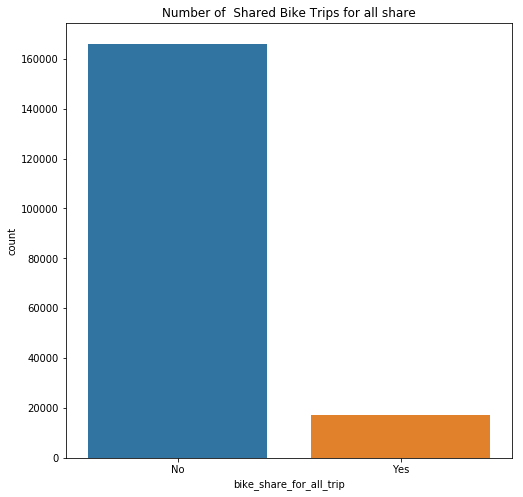

In [61]:
# calling the function count_plot
count_plot((8,8),'bike_share_for_all_trip',df_copy,'Number of  Shared Bike Trips for all share')

This shows that most bike trips are ridden alone meaning people prefer to take bike trips alone.

### AGE

In [62]:
df_copy['age'] = 2022 - df_copy['member_birth_year']
df_copy['age'].astype('int')

0         38
1         37
2         50
3         33
4         48
5         63
6         39
7         33
8         34
9         30
10        26
11        29
12        32
13        37
14        34
15        29
16        41
17        47
18        32
19        44
20        39
21        38
22        31
23        25
24        47
25        36
26        22
27        40
28        37
29        27
          ..
183382    34
183383    25
183384    31
183385    77
183386    24
183387    23
183388    95
183389    37
183390    23
183391    42
183392    29
183393    37
183394    47
183395    29
183396    31
183397    34
183398    40
183399    29
183400    38
183401    31
183402    37
183403    22
183404    42
183405    38
183406    34
183407    26
183408    38
183409    32
183410    34
183411    33
Name: age, Length: 183412, dtype: int64

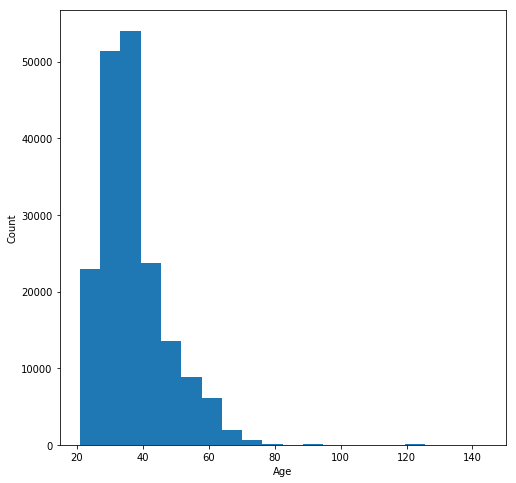

In [63]:
plt.figure(figsize = (8,8))
plt.hist(data  = df_copy, x = 'age', bins = 20)
plt.xlabel('Age')
plt.ylabel('Count')
#plt.title()
plt.show()

In [64]:
# Check for outliers
df_copy['age'].describe()

count    183412.000000
mean         37.193563
std           9.886118
min          21.000000
25%          30.000000
50%          35.000000
75%          41.000000
max         144.000000
Name: age, dtype: float64

In [65]:
df_copy.query('age >= 70')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,age
1073,303,2019-02-28 19:49:38.120,2019-02-28 19:54:42.044,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6333,Subscriber,1945.0,Male,Yes,Thursday,Thursday,77.0
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,Thursday,Thursday,122.0
1526,852,2019-02-28 18:54:26.814,2019-02-28 19:08:39.214,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5091,Subscriber,1952.0,Male,No,Thursday,Thursday,70.0
1586,683,2019-02-28 18:52:11.054,2019-02-28 19:03:34.528,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,26.0,1st St at Folsom St,37.787290,-122.394380,4976,Subscriber,1948.0,Male,No,Thursday,Thursday,74.0
2075,432,2019-02-28 18:25:58.871,2019-02-28 18:33:11.351,171.0,Rockridge BART Station,37.844279,-122.251900,210.0,45th St at Manila,37.833294,-122.256224,3433,Subscriber,1951.0,Male,No,Thursday,Thursday,71.0
2085,694,2019-02-28 18:21:05.187,2019-02-28 18:32:39.596,107.0,17th St at Dolores St,37.763015,-122.426497,89.0,Division St at Potrero Ave,37.769218,-122.407646,385,Subscriber,1941.0,Male,No,Thursday,Thursday,81.0
2314,294,2019-02-28 18:14:31.459,2019-02-28 18:19:25.939,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,171.0,Rockridge BART Station,37.844279,-122.251900,3433,Subscriber,1951.0,Male,No,Thursday,Thursday,71.0
2366,191,2019-02-28 18:14:07.503,2019-02-28 18:17:18.808,76.0,McCoppin St at Valencia St,37.771662,-122.422423,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,6558,Subscriber,1945.0,Male,Yes,Thursday,Thursday,77.0
2484,3458,2019-02-28 17:13:50.585,2019-02-28 18:11:28.806,98.0,Valencia St at 16th St,37.765052,-122.421866,76.0,McCoppin St at Valencia St,37.771662,-122.422423,6558,Subscriber,1945.0,Male,Yes,Thursday,Thursday,77.0
2760,1078,2019-02-28 17:39:24.354,2019-02-28 17:57:23.093,10.0,Washington St at Kearny St,37.795393,-122.404770,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,4655,Subscriber,1951.0,Male,No,Thursday,Thursday,71.0


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The User type variable has only two unique values, customer and suscriber. From the analysis, it was obsereved that more suscribers go on bike trips than customers.

> The age variable has a lot of outliers making the plot difficult to read. The minimum age of bike rides is 21 years while the oldest is 144 years. 

> The member_gender variable has three unique values, Male, Female, Other. The Male gender has the highest count of bike trips followed by the female gender. The least count of bike trips is the female gender.

> Duration_sec plot is rightly skewed, having a lot of outliers. Duration_sec had to be transformed using a logarithmic function.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were unusual distributions in the age and duration_sec field.

> Fields with wrong data types were changed to their correct type. 
  Member_birth_year column had null values which were replaced with average year to avoid removing rows.

## Bivariate Exploration


###  Gender and User_type

(-0.5, 1.5, 0.0, 125078.10000000001)

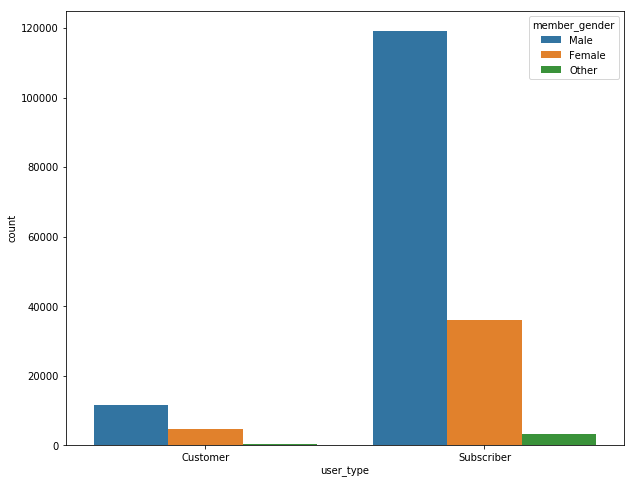

In [66]:
# bar chart showing the number of member_gender that are suscribers or customers
plt.figure(figsize =(10,8))
sb.countplot(data = df_copy, x = 'user_type', hue = 'member_gender', hue_order = ['Male','Female','Other'])
plt.axis()


### Which User type take the longest bike trips

Text(0.5,1,'Duration of User type trip per sec')

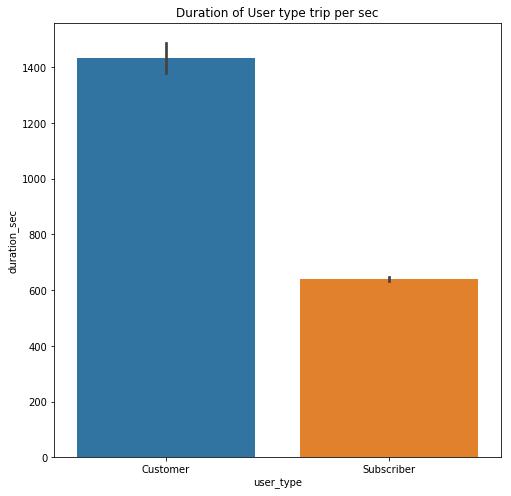

In [67]:
# bar plot showing the user type with the longest bike trips
plt.figure(figsize = (8,8))
sb.barplot(x = 'user_type', y = 'duration_sec', data = df_copy)
plt.title('Duration of User type trip per sec')

### Relationship between duration_sec and member_birth_year

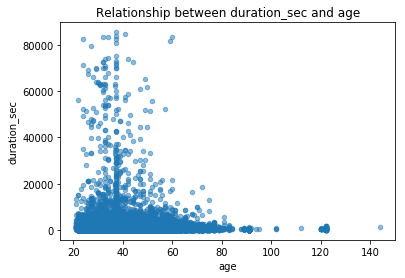

In [68]:
#scatterplot showing the relationship between duration_sec and age
plt.figure(figsize = (10,10))
df_copy.plot(x = 'age', y = 'duration_sec', kind = 'scatter', alpha = 0.5)
plt.title('Relationship between duration_sec and age')
plt.show()

### What day of the week has the longest bike trips?

Text(0.5,1,'Number of bike trips per day')

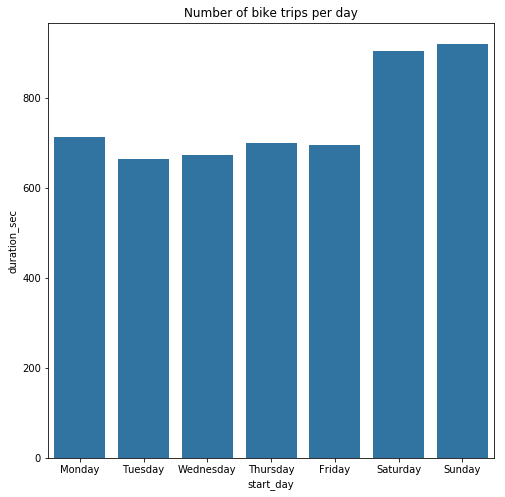

In [69]:
# bar plot showing day with the longest bike trips
plt.figure(figsize= (8,8))
b = sb.color_palette()[0]
sb.barplot(x = 'start_day', y = 'duration_sec', data = df_copy, order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], color = b, ci = None)
plt.title('Number of bike trips per day')

### Age and gender

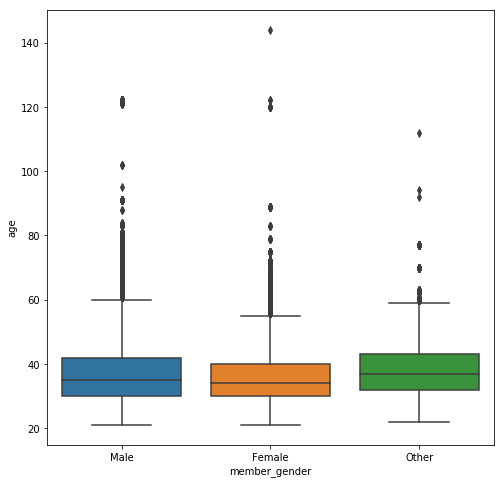

In [70]:
# box plot showing the age distributionof member_gender
plt.figure(figsize = (8,8))
sb.boxplot(x = 'member_gender', y = 'age', data= df_copy, order = ['Male', 'Female', 'Other'])

### What is the age distribution of user_type ?

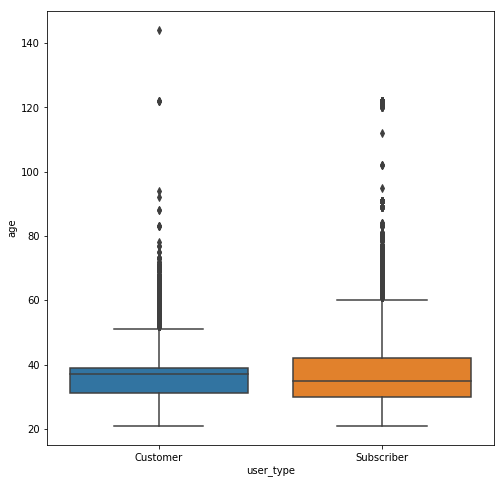

In [71]:

plt.figure(figsize = (8,8))
sb.boxplot(x = 'user_type', y = 'age', data= df_copy)

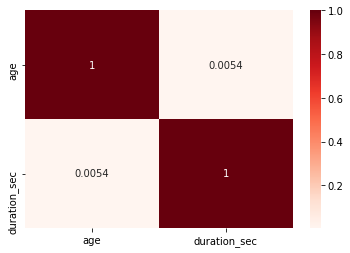

In [72]:
# relationship between age and duration_sec
df_copy[['age','duration_sec']].corr()

sb.heatmap(df_copy[['age','member_gender','duration_sec']].corr(), annot = True, cmap = 'Reds')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most customers spend more time on bike trips than suscribers.

> Most riders spend less time on bike trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is little to no correlation between duration_sec and age.


## Multivariate Exploration



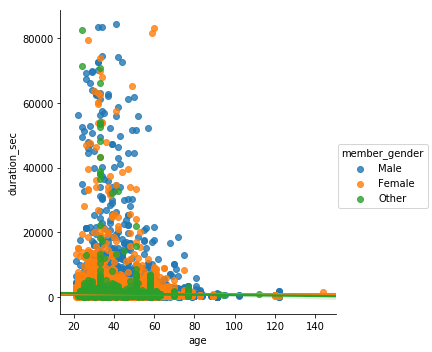

In [73]:
sb.lmplot(x = 'age', y = 'duration_sec', data = df_copy, hue = 'member_gender', hue_order = ['Male','Female', 'Other'])

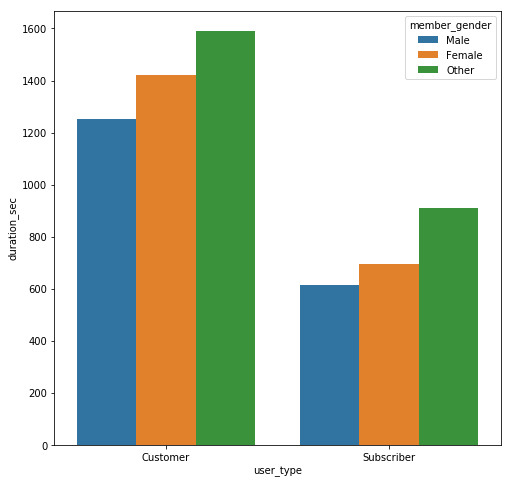

In [74]:
# bar plot showing the relationship between duration_sec,user_type, member_gender
plt.figure(figsize = (8,8))
sb.barplot(y = 'duration_sec', x = 'user_type', hue = 'member_gender', hue_order = ['Male','Female','Other'], data = df_copy, ci = None)

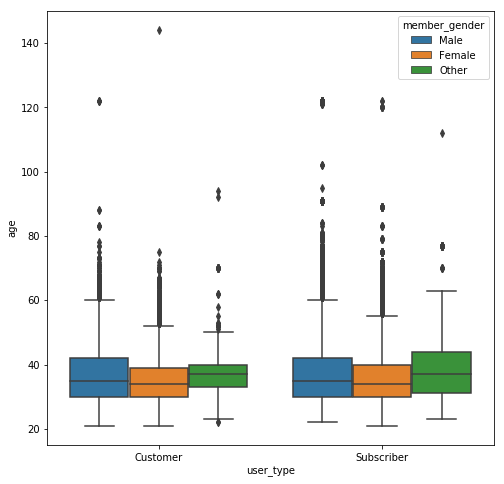

In [75]:
#box plot showing the distribution between age and user type, gender
plt.figure(figsize = (8,8))
sb.boxplot(y = 'age', x = 'user_type', hue = 'member_gender', hue_order = ['Male','Female','Other'], data = df_copy)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> No features strengthed each other

### Were there any interesting or surprising interactions between features?

> There was no surprising interactions between features.

## Conclusions
From the analysis above its shows that suscribers are most likley to go on bike trips than customers, the gender being more Males than females. It was also observed that most tips will last for less than 1000 seconds.
